## 1. Import and observe dataset

In [4]:
import numpy as np
import pandas as pd
import nltk
np.random.seed(5)
movies_df = pd.read_csv('datasets/movies.csv')
print("Number of movies loaded: %s " % (len(movies_df)))
movies_df.head()

Number of movies loaded: 100 


,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


## 2. Combine Wikipedia and IMDb plot summaries

In [8]:
movies_df['plot'] = movies_df['wiki_plot'].astype(str) + "\n" + \
                 movies_df['imdb_plot'].astype(str)
movies_df.head()

,rank,title,genre,wiki_plot,imdb_plot,plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...


## 3. Tokenization

In [9]:
sent_tokenized = [sent for sent in nltk.sent_tokenize("""
                        Today (May 19, 2016) is his only daughter's wedding. 
                        Vito Corleone is the Godfather.
                        """)]
words_tokenized = [word for word in nltk.word_tokenize(sent_tokenized[0])]
import re
filtered = [word for word in words_tokenized if re.search('[A-z]', word)]
filtered

['Today', 'May', 'is', 'his', 'only', 'daughter', "'s", 'wedding']

## 4. Stemming

In [10]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
print("Without stemming: ", filtered)
stemmed_words = [stemmer.stem(word) for word in filtered]
print("After stemming:   ", stemmed_words)

Without stemming:  ['Today', 'May', 'is', 'his', 'only', 'daughter', "'s", 'wedding']
After stemming:    ['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed']


## 5. Club together Tokenize & Stem

In [11]:
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    stems = [stemmer.stem(word) for word in filtered_tokens]
    return stems

words_stemmed = tokenize_and_stem("Today (May 19, 2016) is his only daughter's wedding.")
print(words_stemmed)

['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed']


## 6. Create TfidfVectorizer
<p>Computers do not <em>understand</em> text. These are machines only capable of understanding numbers and performing numerical computation. Hence, we must convert our textual plot summaries to numbers for the computer to be able to extract meaning from them. One simple method of doing this would be to count all the occurrences of each word in the entire vocabulary and return the counts in a vector. Enter <code>CountVectorizer</code>.</p>
<p>Consider the word 'the'. It appears quite frequently in almost all movie plots and will have a high count in each case. But obviously, it isn't the theme of all the movies! <a href="https://campus.datacamp.com/courses/natural-language-processing-fundamentals-in-python/simple-topic-identification?ex=11">Term Frequency-Inverse Document Frequency</a> (TF-IDF) is one method which overcomes the shortcomings of <code>CountVectorizer</code>. The Term Frequency of a word is the measure of how often it appears in a document, while the Inverse Document Frequency is the parameter which reduces the importance of a word if it frequently appears in several documents.</p>
<p>For example, when we apply the TF-IDF on the first 3 sentences from the plot of <em>The Wizard of Oz</em>, we are told that the most important word there is 'Toto', the pet dog of the lead character. This is because the movie begins with 'Toto' biting someone due to which the journey of Oz begins!</p>
<p>In simplest terms, TF-IDF recognizes words which are unique and important to any given document. Let's create one for our purposes.</p>

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

## 7. Fit transform TfidfVectorizer
<p>Once we create a TF-IDF Vectorizer, we must fit the text to it and then transform the text to produce the corresponding numeric form of the data which the computer will be able to understand and derive meaning from. To do this, we use the <code>fit_transform()</code> method of the <code>TfidfVectorizer</code> object. </p>
<p>If we observe the <code>TfidfVectorizer</code> object we created, we come across a parameter stopwords. 'stopwords' are those words in a given text which do not contribute considerably towards the meaning of the sentence and are generally grammatical filler words. For example, in the sentence 'Dorothy Gale lives with her dog Toto on the farm of her Aunt Em and Uncle Henry', we could drop the words 'her' and 'the', and still have a similar overall meaning to the sentence. Thus, 'her' and 'the' are stopwords and can be conveniently dropped from the sentence. </p>
<p>On setting the stopwords to 'english', we direct the vectorizer to drop all stopwords from a pre-defined list of English language stopwords present in the nltk module. Another parameter, <code>ngram_range</code>, defines the length of the ngrams to be formed while vectorizing the text.</p>

In [14]:
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in movies_df["plot"]])

print(tfidf_matrix.shape)

(100, 564)


## 8. Import KMeans and create clusters

In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
movies_df["cluster"] = clusters
movies_df['cluster'].value_counts() 

2    28
4    26
0    22
1    18
3     6
Name: cluster, dtype: int64

## 9. Calculate similarity distance
<p>Consider the following two sentences from the movie <em>The Wizard of Oz</em>: </p>
<blockquote>
  <p>"they find in the Emerald City"</p>
  <p>"they finally reach the Emerald City"</p>
</blockquote>
<p>If we put the above sentences in a <code>CountVectorizer</code>, the vocabulary produced would be "they, find, in, the, Emerald, City, finally, reach" and the vectors for each sentence would be as follows: </p>
<blockquote>
  <p>1, 1, 1, 1, 1, 1, 0, 0</p>
  <p>1, 0, 0, 1, 1, 1, 1, 1</p>
</blockquote>
<p>When we calculate the cosine angle formed between the vectors represented by the above, we get a score of 0.667. This means the above sentences are very closely related. <em>Similarity distance</em> is 1 - <a href="https://en.wikipedia.org/wiki/Cosine_similarity">cosine similarity angle</a>. This follows from that if the vectors are similar, the cosine of their angle would be 1 and hence, the distance between then would be 1 - 1 = 0.</p>
<p>Let's calculate the similarity distance for all of our movies.</p>

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

## 10. Import Matplotlib, Linkage, and Dendrograms

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram

## 11. Create merging and plot dendrogram

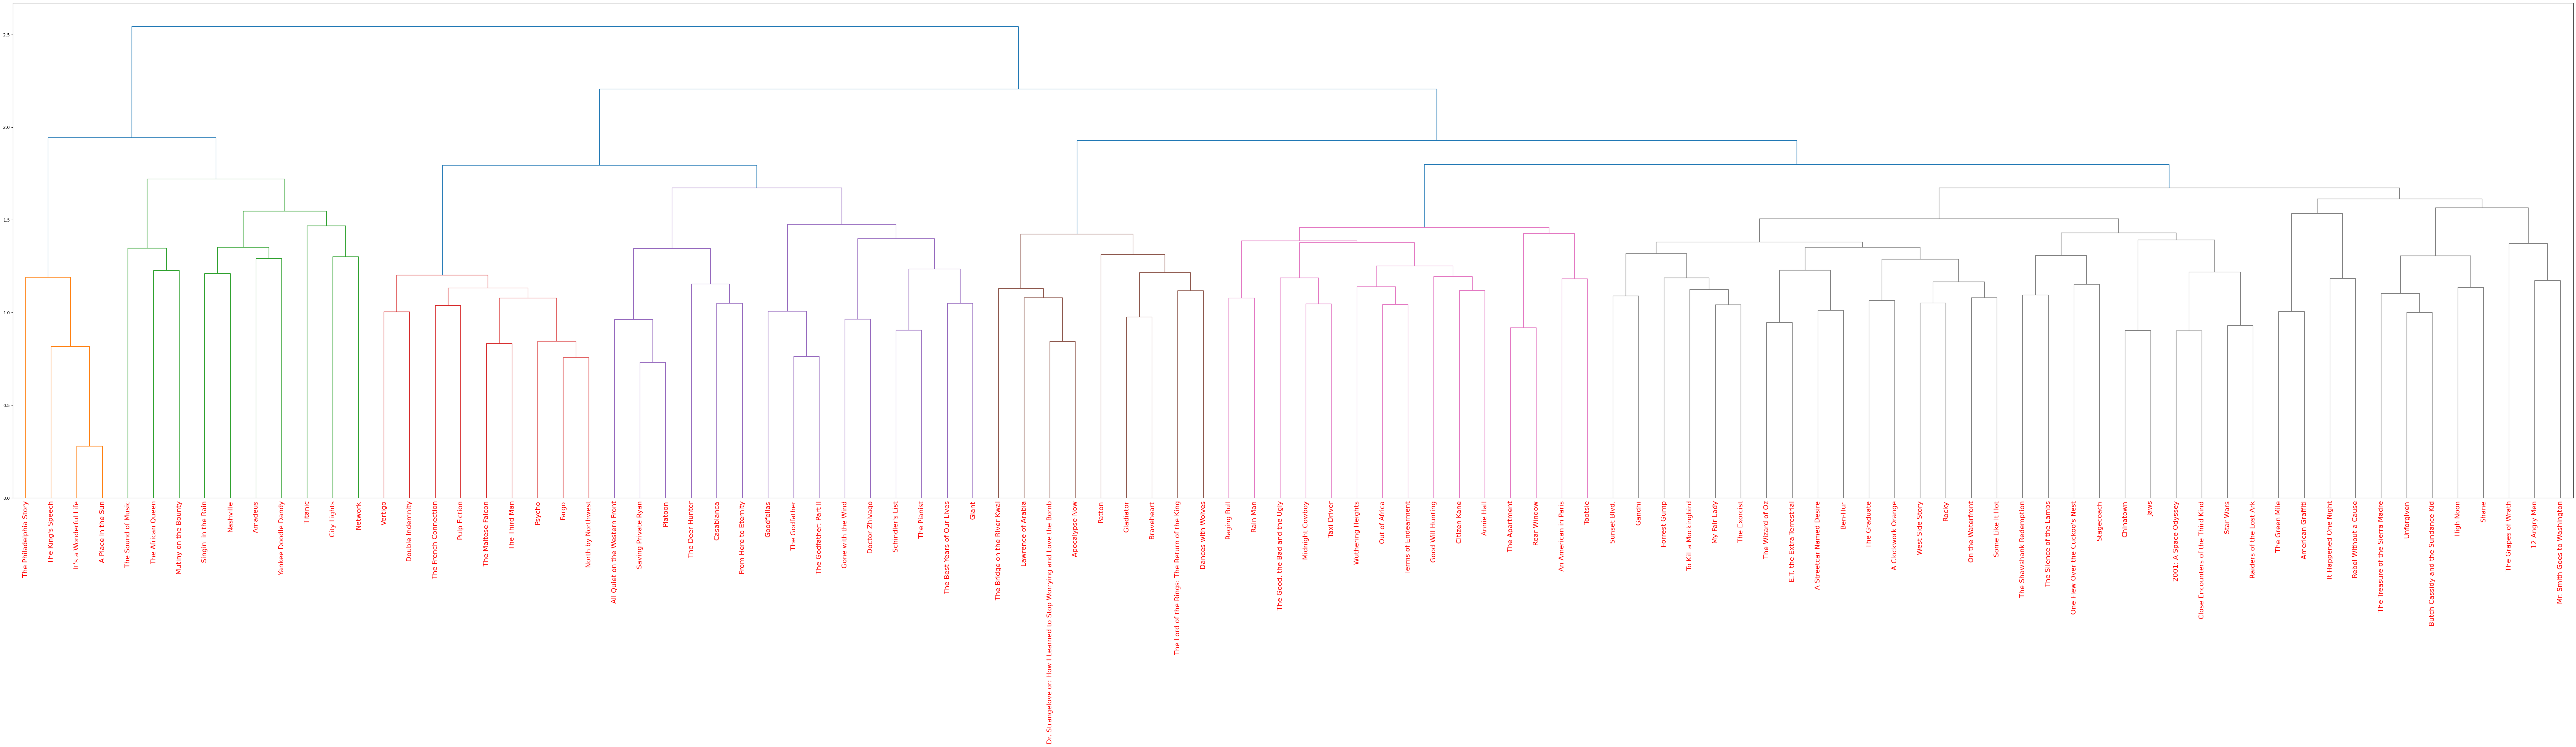

In [18]:
mergings = linkage(similarity_distance, method='complete')
dendrogram_ = dendrogram(mergings,
               labels=[x for x in movies_df["title"]],
               leaf_rotation=90,
               leaf_font_size=16,
)

fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)
plt.show()

## 12. Which movies are most similar?
<p>We can now determine the similarity between movies based on their plots! To wrap up, let's answer one final question: which movie is most similar to the movie <em>Braveheart</em>?</p>

In [19]:
# Answer the question 
ans = "Gladiator"
print(ans)

Gladiator
